In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [12]:
import matplotlib.pyplot as plt
from pygeotools.lib import malib, iolib, geolib
from imview.lib import pltlib
import os

In [4]:
%cd /nobackup/deshean/data/tandemx/hma

/nobackupp8/deshean/data/tandemx/hma


In [5]:
tilelist = !ls -d *C | awk -F'_' '{print $5}'

In [6]:
#Sample tile
tile = 'N34E073'
dir = !ls -d *$tile*_C
dir = dir[0]

In [7]:
dir

'TDM1_DEM__30_N34E073_V01_C'

In [7]:
%run /home1/deshean/src/nasadem/tandemx_mask.py $dir

TDM1_DEM__30_N34E073_V01_C
TDM1_DEM__30_N34E073_V01_C/DEM/TDM1_DEM__30_N34E073_DEM.tif
1430086
1316688


In [8]:
dem_fn_list = !ls *$tile*_C/DEM/*_DEM*tif
dem_fn_list

['TDM1_DEM__30_N34E073_V01_C/DEM/TDM1_DEM__30_N34E073_DEM.tif',
 'TDM1_DEM__30_N34E073_V01_C/DEM/TDM1_DEM__30_N34E073_DEM_masked.tif']

<IPython.core.display.Javascript object>


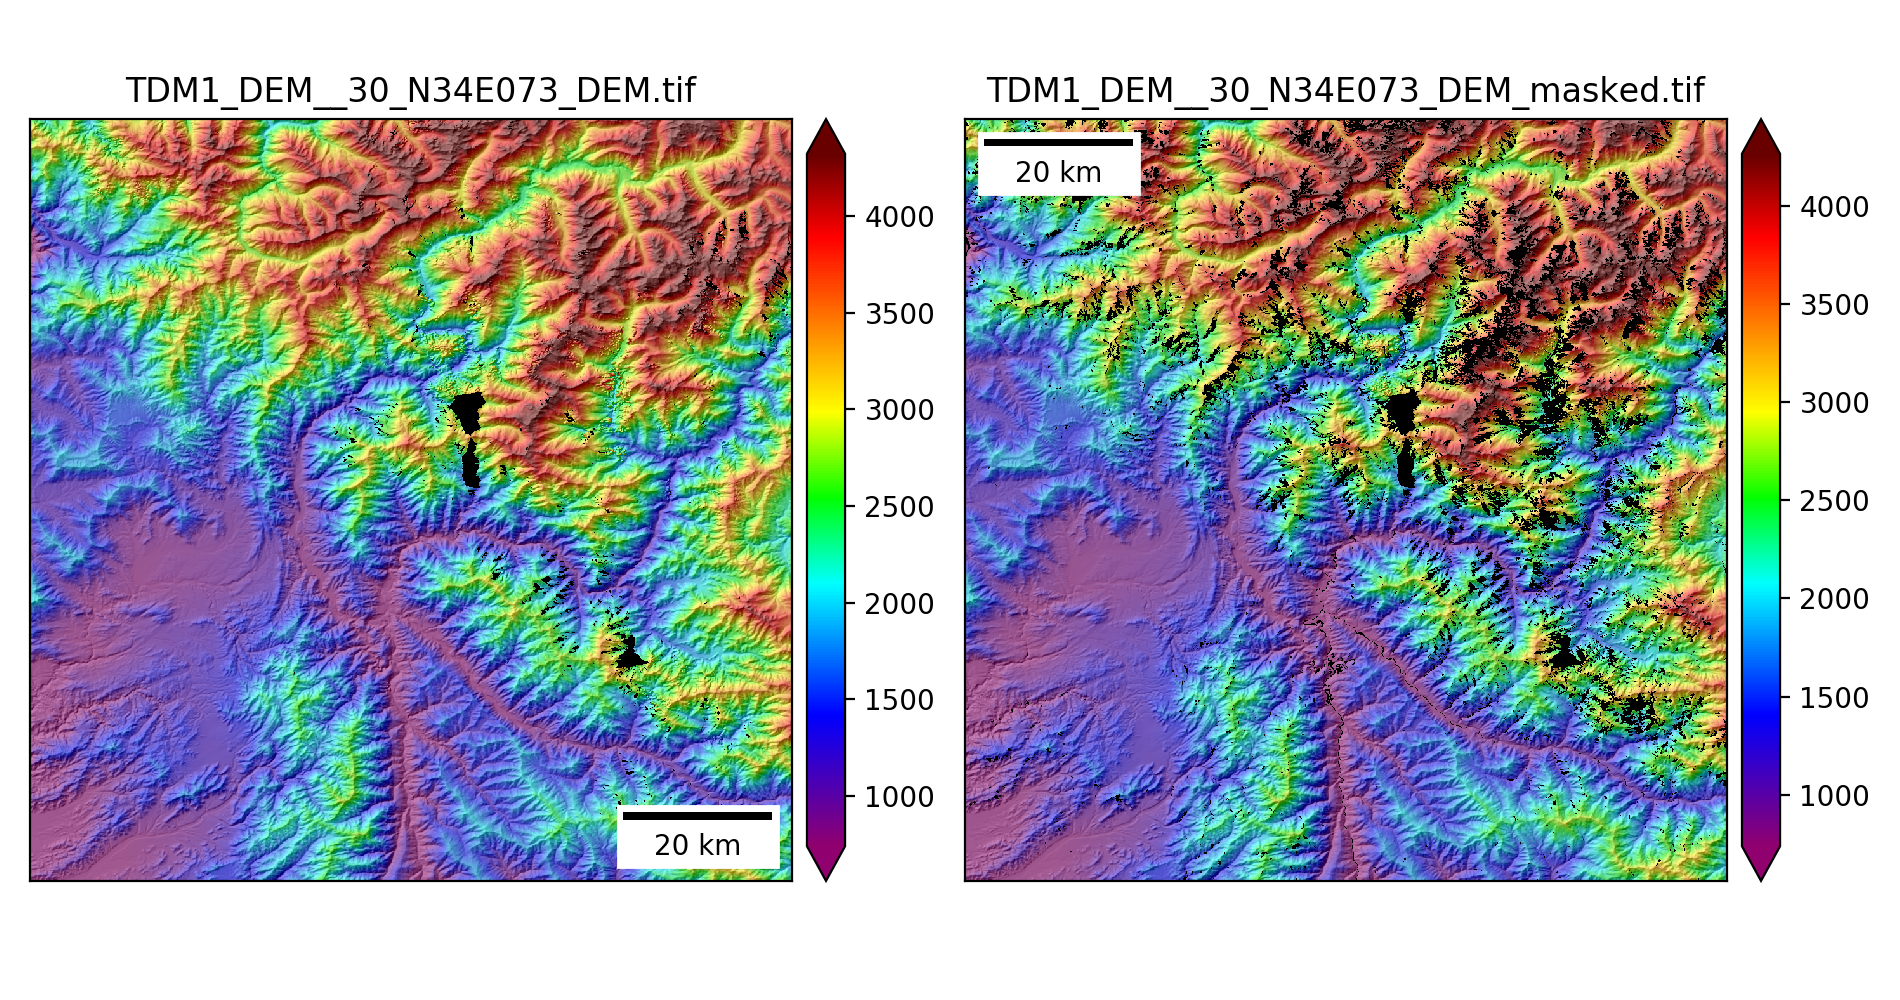

Text(0.5, 1.0, 'TDM1_DEM__30_N34E073_DEM_masked.tif')

In [13]:
f,axa = plt.subplots(1,2, sharex=True, sharey=True, figsize=(9.5,5))
dem_ds = iolib.fn_getds(dem_fn_list[0]); dem = iolib.ds_getma(dem_ds)
dem_masked_ds = iolib.fn_getds(dem_fn_list[1]); dem_masked = iolib.ds_getma(dem_masked_ds)
pltlib.iv(dem, ax=axa[0], ds=dem_ds, hillshade=True)
pltlib.iv(dem_masked, ax=axa[1], ds=dem_masked_ds, hillshade=True)
axa[0].set_title(os.path.split(dem_fn_list[0])[-1])
axa[1].set_title(os.path.split(dem_fn_list[1])[-1])

<IPython.core.display.Javascript object>


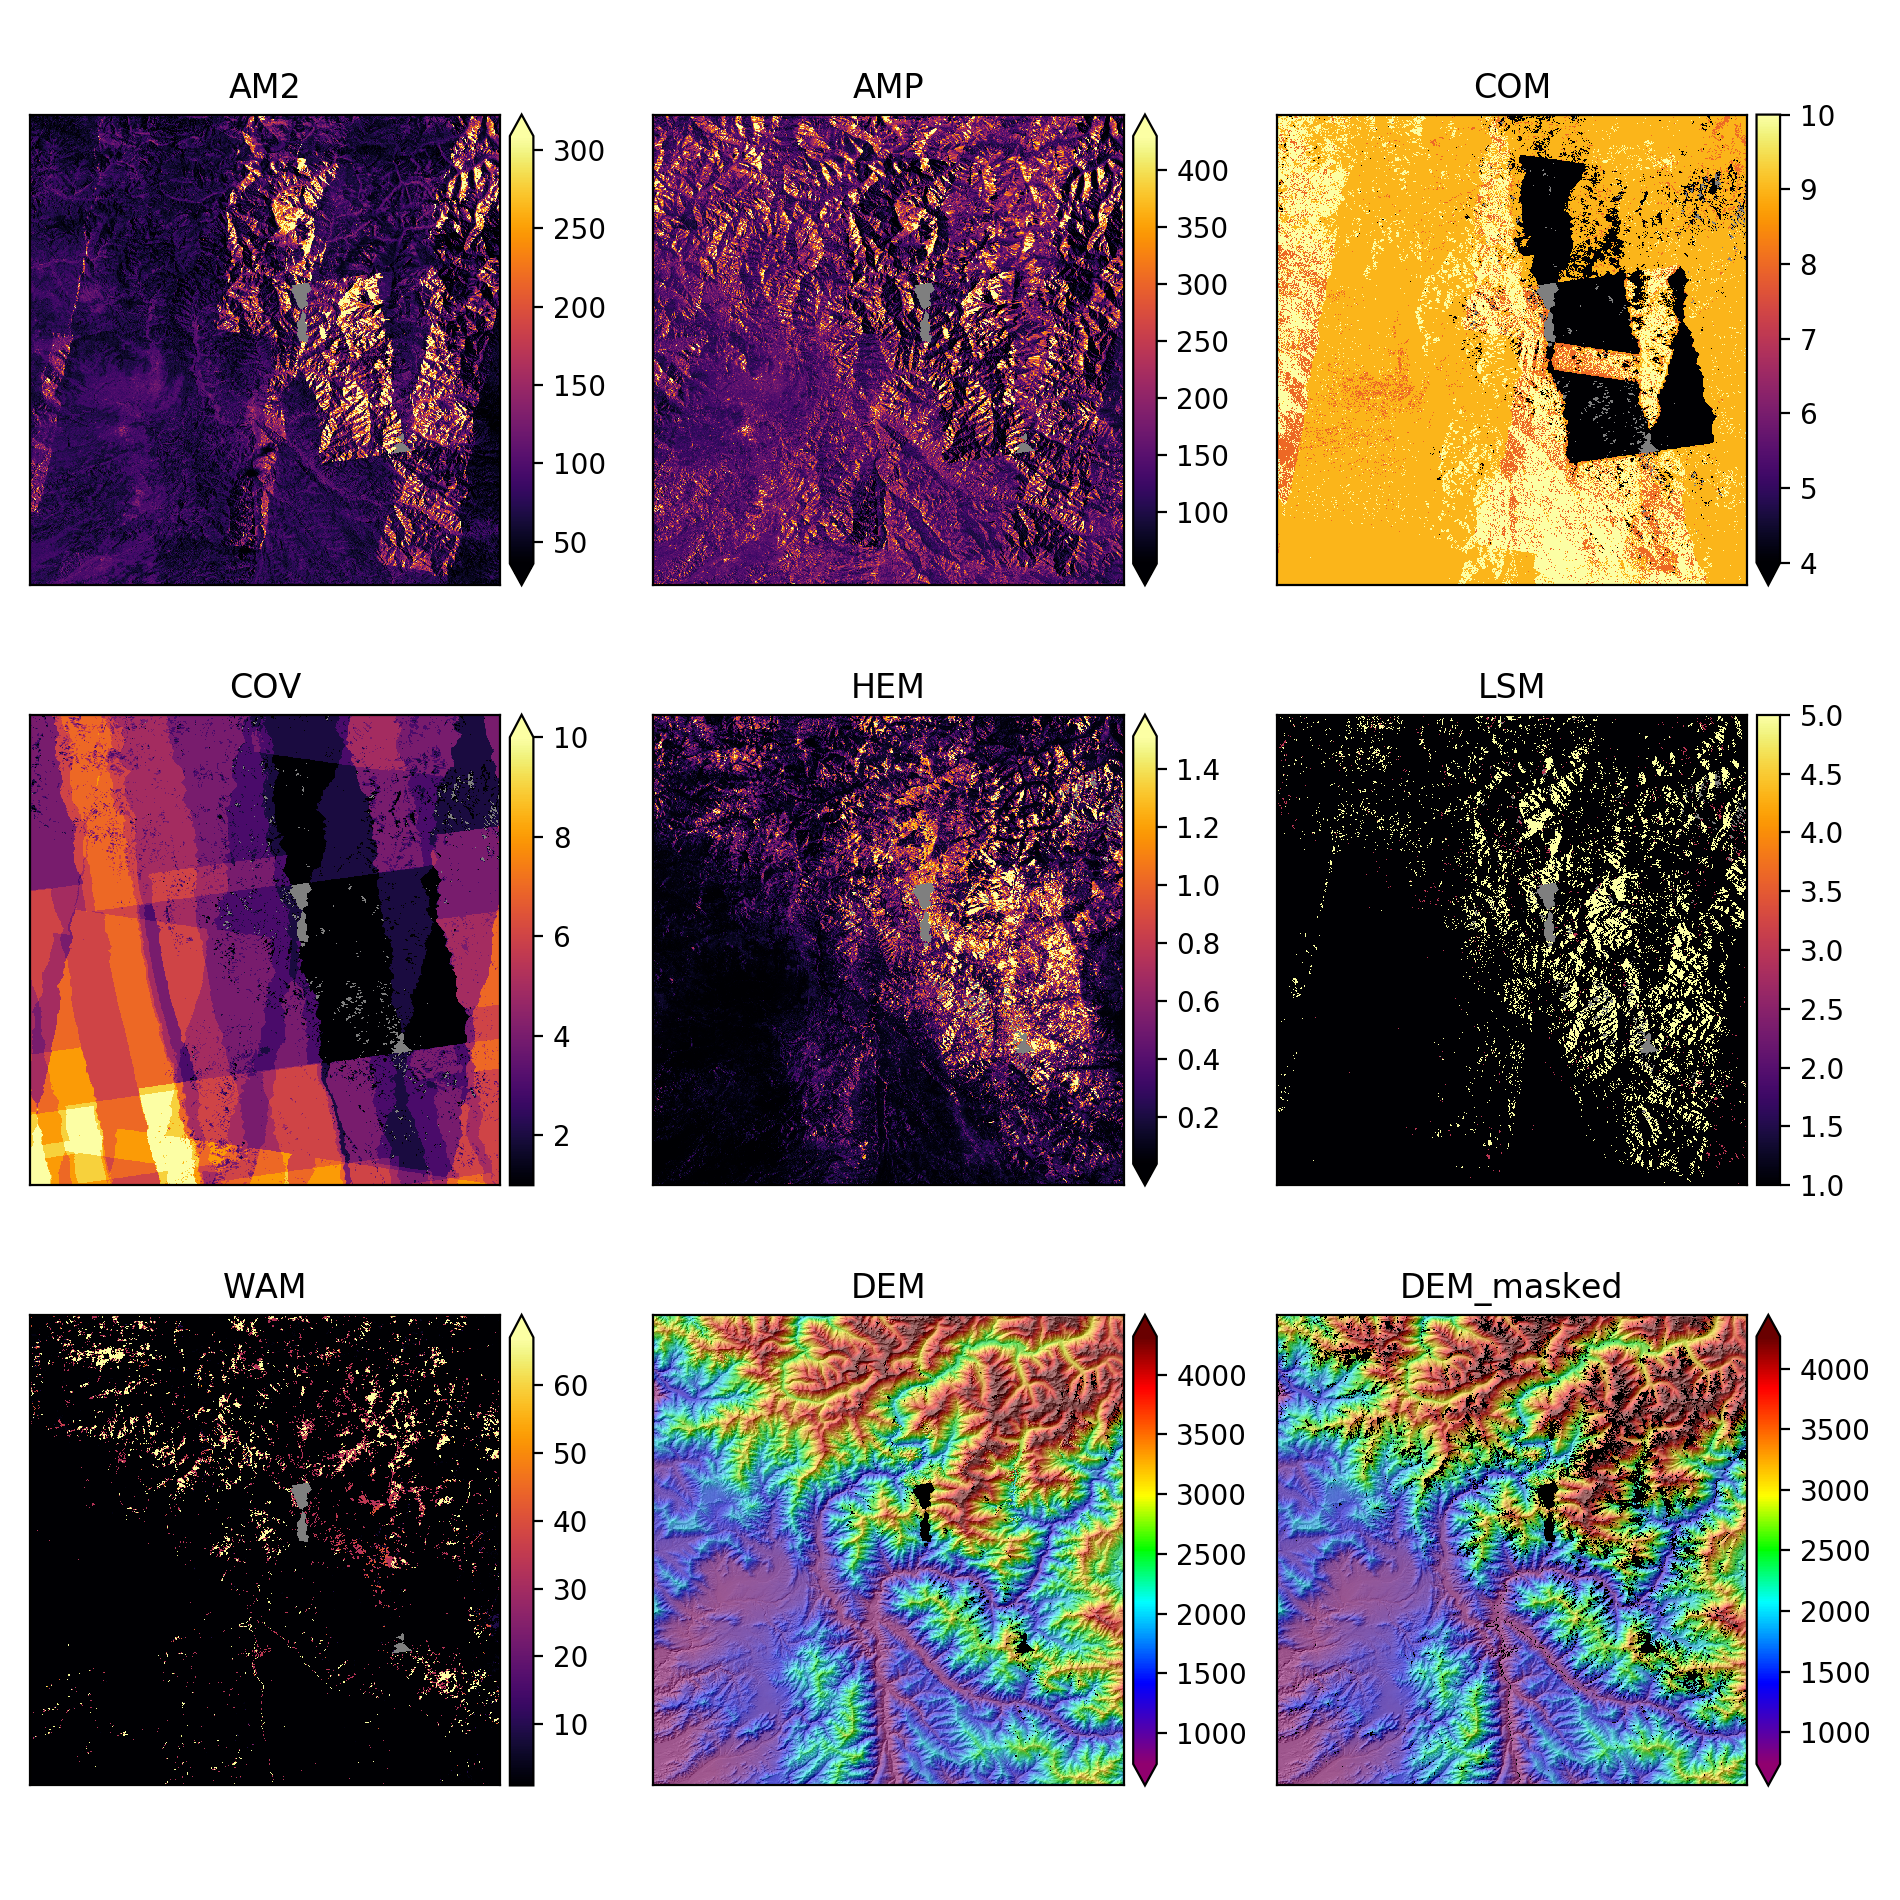

In [14]:
fn_list = !ls *$tile*_C/AUXFILES/*tif
f,axa = plt.subplots(3,3,sharex=True, sharey=True, figsize=(9.5,9.5))
for i,fn in enumerate(fn_list):
    a = iolib.fn_getma(fn)
    pltlib.iv(a, ax=axa.reshape(-1)[i], cmap='inferno', title=fn[-7:-4])
pltlib.iv(dem, ax=axa.reshape(-1)[i+1], ds=dem_ds, hillshade=True, scalebar=False, title='DEM')
pltlib.iv(dem_masked, ax=axa.reshape(-1)[i+2], ds=dem_masked_ds, hillshade=True, scalebar=False, title='DEM_masked')

In [15]:
mos_fn='mos/TDM1_DEM_90m_hma_DEM_masked_aea.tif'
pltlib.iv_fn(mos_fn, kwargs={'cmap':'cpt_rainbow'})
mos_hs_fn='mos/TDM1_DEM_90m_hma_DEM_masked_aea_hs_az315.tif'
pltlib.iv_fn(mos_hs_fn, kwargs={'cmap':'gray'})

TypeError: iv() got an unexpected keyword argument 'kwargs'